In [2]:
import sys
sys.path.insert(0, '../..')  # Füge das übergeordnete Verzeichnis zum Python-Pfad hinzu
from utils_functions import to_float_array, df_d0, dataframe1
import glob
import os
import pandas as pd
from IPython.display import display
import numpy as np


In [3]:
data_path = '/workspaces/EWT/EWT6/data/ETW6.ods'
df_E_PfFNT_ilacco1_0 = pd.read_excel(data_path, engine='odf', sheet_name="Sheet12", skiprows=36)
df_E_PfFNT_ilacco1_1 = pd.read_excel(data_path, engine='odf', sheet_name="Sheet13", skiprows=36)
df_E_PfFNT_ilacco1_2 = pd.read_excel(data_path, engine='odf', sheet_name="Sheet14", skiprows=36)
df_E_PfFNT_FP_ilacco1_0 = pd.read_excel(data_path, engine='odf', sheet_name="Sheet15", skiprows=36)
df_E_PfFNT_ilacco1_0_50µM_CCCP = pd.read_excel(data_path, engine='odf', sheet_name="Sheet16", skiprows=36)
df_E_PfFNT_ilacco1_1_50µM_CCCP = pd.read_excel(data_path, engine='odf', sheet_name="Sheet17", skiprows=36)
df_E_PfFNT_ilacco1_2_50µM_CCCP = pd.read_excel(data_path, engine='odf', sheet_name="Sheet18", skiprows=36)
df_E_PfFNT_FP_ilacco1_0_50μM_CCCP = pd.read_excel(data_path, engine='odf', sheet_name="Sheet19", skiprows=36)
print(df_E_PfFNT_ilacco1_0)

    Startzeit:                         21.11.2025 12:13:47 Unnamed: 2  \
0          NaN                                         NaN        NaN   
1          NaN                                         NaN        NaN   
2   Zyklus Nr.                                           1          2   
3     Zeit [s]                                           0         13   
4   Temp. [°C]                                          --         --   
5           A7                                       39147      37307   
6           A8                                       28149      27450   
7           A9                                       33906      32746   
8          NaN                                         NaN        NaN   
9          NaN  Efflux 1 mM Lactat (1:40): PfFNT+ilacco1.0        NaN   
10         NaN                                         NaN        NaN   
11         NaN                                         NaN        NaN   
12    Endzeit:                         21.11.2025 1

In [4]:
E_PfFNT_ilacco1_0 = dataframe1(df_E_PfFNT_ilacco1_0,3,5,6,7)
E_PfFNT_ilacco1_1 = dataframe1(df_E_PfFNT_ilacco1_1,3,5,6,7)
E_PfFNT_ilacco1_2 = dataframe1(df_E_PfFNT_ilacco1_2,3,5,6,7)
E_PfFNT_FP_ilacco1_0 = dataframe1(df_E_PfFNT_FP_ilacco1_0,3,5,6,7)
E_PfFNT_ilacco1_0_50μM_CCCP = dataframe1(df_E_PfFNT_ilacco1_0_50μM_CCCP,3,5,6,7)
E_PfFNT_ilacco1_1_50μM_CCCP = dataframe1(df_E_PfFNT_ilacco1_1_50μM_CCCP,3,5,6,7)
E_PfFNT_ilacco1_2_50μM_CCCP = dataframe1(df_E_PfFNT_ilacco1_2_50μM_CCCP,3,5,6,7)
E_PfFNT_FP_ilacco1_0_50μM_CCCP = dataframe1(df_E_PfFNT_FP_ilacco1_0_50μM_CCCP,3,5,6,7)

print(E_PfFNT_ilacco1_0)

     Time  1.Messung  2.Messung  3.Messung  Mittelwerte  Standardabweichung
0     0.0   0.000000   0.000000   0.000000     0.000000            0.000000
1    13.0  -0.047002  -0.024832  -0.034212    -0.035349            0.011129
2    26.0  -0.121848  -0.061210  -0.046039    -0.076366            0.040113
3    39.0  -0.173806  -0.105830  -0.071226    -0.116954            0.052187
4    52.0  -0.197129  -0.135067  -0.090132    -0.140776            0.053727
5    65.0  -0.205048  -0.149064  -0.097652    -0.150588            0.053714
6    78.0  -0.222367  -0.161817  -0.110157    -0.164781            0.056163
7    91.0  -0.244821  -0.177271  -0.132307    -0.184800            0.056633
8   104.0  -0.273712  -0.189527  -0.146670    -0.203303            0.064631
9   117.0  -0.304442  -0.203311  -0.169203    -0.225652            0.070333
10  130.0  -0.345109  -0.214999  -0.187961    -0.249356            0.084019
11  143.0  -0.385291  -0.228250  -0.215449    -0.276330            0.094580
12  156.0  -

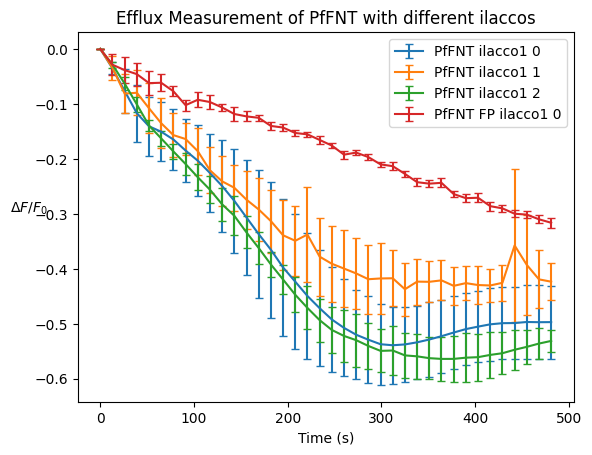

In [5]:
import matplotlib.pyplot as plt

data_frames = [E_PfFNT_ilacco1_0,
               E_PfFNT_ilacco1_1,
               E_PfFNT_ilacco1_2,
               E_PfFNT_FP_ilacco1_0,
               ]
labels = ['PfFNT ilacco1 0',
          'PfFNT ilacco1 1',
          'PfFNT ilacco1 2',
          'PfFNT FP ilacco1 0',]

for df, label in zip(data_frames, labels):
    plt.errorbar(df['Time'], df['Mittelwerte'], yerr=df['Standardabweichung'], label=label, capsize=3)
plt.xlabel('Time (s)')
plt.ylabel(r"$\Delta F/F_0$", rotation = 0)
plt.title('Efflux Measurement of PfFNT with different ilaccos')
plt.legend()
plt.show()

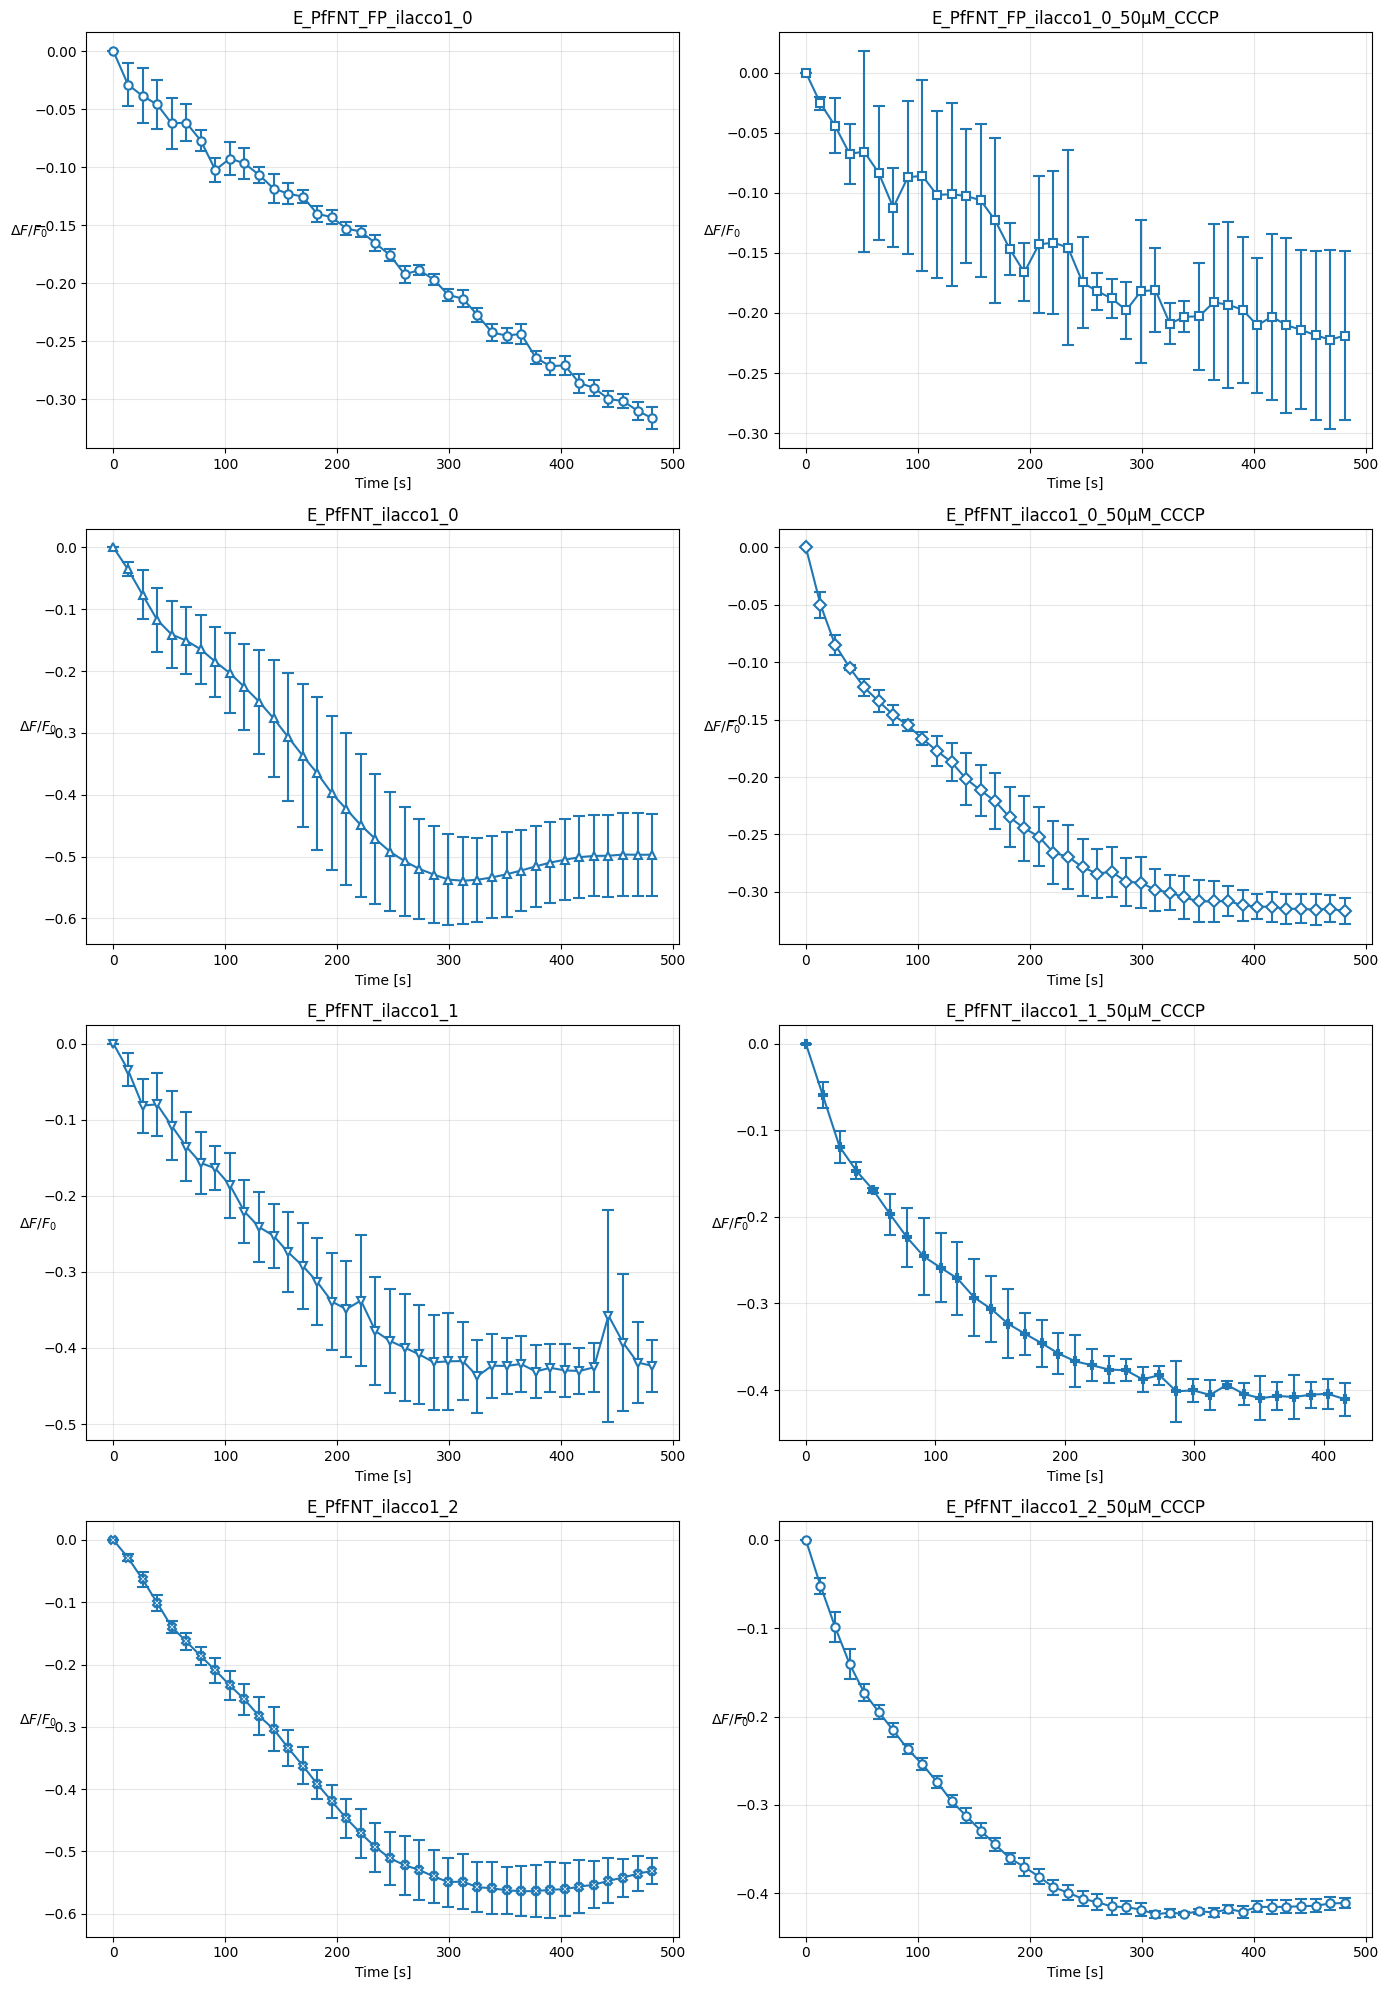

Saved combined Efflux subplot: ../figueres/Efflux_all_subplots.png
Saved combined Efflux subplot: ../figueres/Efflux_all_subplots.png


In [6]:
# Erstelle Subplots für alle `E_MCT1_ilacco1_*` DataFrames (verwende feste Spalten: 'Time','Mittelwerte','Standartabweichung')
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sammle automatisch alle DataFrames, die mit dem Prefix beginnen
frames = []
for name in sorted(globals()):
    if name.startswith('E_PfFNT_'):
        frames.append((name, globals().get(name)))

if len(frames) == 0:
    print('Keine DataFrames mit Prefix "E_BSG_MCT1_ilacco1_" gefunden.')
os.makedirs(os.path.join('..', 'figueres'), exist_ok=True)

# Verschiedene Marker für jede Kurve
markers = ['o', 's', '^', 'D', 'v', 'P', 'X']

# Bestimme Grid-Größe
n = len(frames)
cols = 2
rows = (n + cols - 1) // cols if n>0 else 1
fig, axes = plt.subplots(rows, cols, figsize=(14, 5*rows))
if isinstance(axes, np.ndarray):
    axes = axes.flatten()
else:
    axes = [axes]

for ax in axes[n:]:
    ax.axis('off')

for i, ((name, df), ax) in enumerate(zip(frames, axes)):
    ax.clear()
    if df is None:
        ax.text(0.5, 0.5, f"{name} not found", ha='center', va='center')
        ax.set_title(name)
        continue

    # Erwartete Spalten: 'Time', 'Mittelwerte'
    if 'Time' not in df.columns or 'Mittelwerte' not in df.columns:
        ax.text(0.5, 0.5, "Erwartete Spalten 'Time' oder 'Mittelwerte' fehlen", ha='center', va='center')
        ax.set_title(name)
        print(f"{name}: Fehlende Spalten. Vorhandene Spalten: {df.columns.tolist()}")
        continue

    times = pd.to_numeric(df['Time'], errors='coerce')
    means = pd.to_numeric(df['Mittelwerte'], errors='coerce')

    # Std-Spalte: bevorzugt 'Standartabweichung', fallback auf 'Standardabweichung'
    if 'Standartabweichung' in df.columns:
        stds = pd.to_numeric(df['Standartabweichung'], errors='coerce')
    elif 'Standardabweichung' in df.columns:
        stds = pd.to_numeric(df['Standardabweichung'], errors='coerce')
    else:
        stds = np.zeros_like(means)

    mask = (~times.isna()) & (~means.isna())
    if mask.sum() == 0:
        ax.text(0.5, 0.5, 'Keine gültigen Daten zum Plotten', ha='center', va='center')
    marker = markers[i % len(markers)]
    ax.errorbar(times[mask], means[mask], yerr=stds[mask], 
                marker=marker, linestyle='-', capsize=4,
                markerfacecolor='white', markeredgewidth=1.5, markersize=6)
    ax.set_title(name)
    ax.set_xlabel('Time [s]')
    ax.set_ylabel(r'$\Delta F/F_0$', rotation = 0)
    ax.grid(alpha=0.3)

plt.tight_layout()
outpath = os.path.join('..', 'figueres', 'Efflux_all_subplots.png')

plt.savefig(outpath, dpi=300, bbox_inches='tight')
plt.savefig(outpath, dpi=300, bbox_inches='tight')
plt.show()

print(f'Saved combined Efflux subplot: {outpath}')
print(f'Saved combined Efflux subplot: {outpath}')
plt.show()

Keine DataFrames mit Prefix "E_MCT1_ilacco1_" gefunden.
Keine Daten geplottet (keine passenden Spalten).


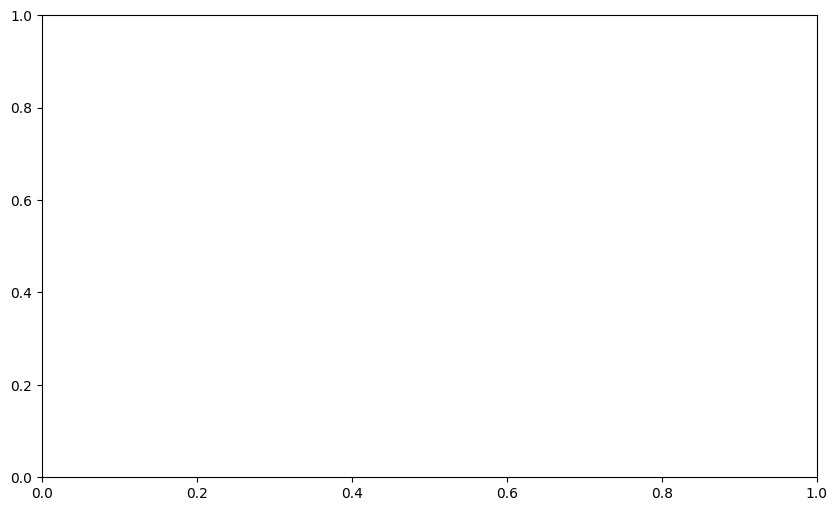

In [7]:
# Kombiniere alle `E_MCT1_ilacco1_*` DataFrames in einem Overlay-Plot
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

markers = ['o', 's', '^', 'D', 'v', 'P', 'X']

# Sammle automatisch alle DataFrames, die mit dem Prefix beginnen
frames = []
for name in sorted(globals()):
    if name.startswith('E_BSG_MCT1_ilacco1_'):
        frames.append((name, globals().get(name)))

if len(frames) == 0:
    print('Keine DataFrames mit Prefix "E_MCT1_ilacco1_" gefunden.')

# Farben/linestyles
linestyles = ['-', '--', '-.', ':']
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

os.makedirs(os.path.join('..', 'figueres'), exist_ok=True)

plt.figure(figsize=(10,6))
ax = plt.gca()
plotted = False

for idx, (name, df) in enumerate(frames):
    ls = linestyles[idx % len(linestyles)]
    color = colors[idx % len(colors)]
    if df is None:
        print(f"Variable {name} nicht gefunden — überspringe.")
        continue

    # Finde Time
    if 'Time' in df.columns:
        times = pd.to_numeric(df['Time'], errors='coerce')
    else:
        times = pd.to_numeric(df.iloc[:,0], errors='coerce')

    # Verwende generische 'Mittelwerte' Spalte
    if 'Mittelwerte' in df.columns:
        means = pd.to_numeric(df['Mittelwerte'], errors='coerce')
        if 'Standartabweichung' in df.columns:
            stds = pd.to_numeric(df['Standartabweichung'], errors='coerce')
        elif 'Standardabweichung' in df.columns:
            stds = pd.to_numeric(df['Standardabweichung'], errors='coerce')
        else:
            stds = np.zeros_like(means)

        mask = (~times.isna()) & (~means.isna())
        if mask.sum() == 0:
            continue
        ax.errorbar(times[mask], means[mask], yerr=stds[mask], fmt='o'+ls, color=color, label=name, capsize=3)
        plotted = True
    else:
        print(f"{name}: Spalte 'Mittelwerte' nicht gefunden, überspringe.")

if not plotted:
    print('Keine Daten geplottet (keine passenden Spalten).')
else:
    ax.set_xlabel('Time [s]')
    ax.set_ylabel(r'$\Delta F/F_0$', rotation = 0)
    ax.grid(alpha=0.3)
    ax.legend(ncol=2, fontsize=9)
    plt.tight_layout()
    outpath = os.path.join('..', 'figueres', 'Efflux_combined_overlay.png')
    plt.savefig(outpath, dpi=300, bbox_inches='tight')
    print(f'Saved combined overlay plot: {outpath}')
    plt.show()

In [8]:
# verschiedene Ilaccos bei 10 mM Lactat Influx

data_frames = [
    ('E_MCT1_ilacco1_0','o', E_MCT1_ilacco1_0),
    ('E_MCT1_ilacco1_1', 's', E_MCT1_ilacco1_1),
    ('E_MCT1_ilacco1_2', '^', E_MCT1_ilacco1_2),
    ("E_MCT1_ilacco1_0_50μM_CCCP",'D', E_MCT1_ilacco1_0_50μM_CCCP),
    ("E_MCT1_ilacco1_1_50μM_CCCP","X", E_MCT1_ilacco1_1_50μM_CCCP)
]

for name,marker, df in data_frames:
    plt.errorbar(df["Time"], df["Mittelwerte"], yerr=df["Standardabweichung"], 
                    marker=marker, linestyle='-', label=name, capsize=4, 
                    markerfacecolor='white', markeredgewidth=1.5, markersize=6)
plotted_any = True

plt.xlabel('Time [s]')
plt.ylabel(r'$\Delta F/F_0$', rotation=0, labelpad=12)
plt.title("MCT1 10 mM Lactat Influx bei verschiedenen Ilaccos")
ax = plt.gca()
ax.yaxis.set_label_coords(-0.08, 0.5)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

outpath = os.path.join('..', 'figueres', f'{name}_plot.png')
#plt.savefig(outpath, dpi=300, bbox_inches='tight')
print(f'Saved plot: {outpath}')
plt.show()

NameError: name 'E_MCT1_ilacco1_0' is not defined